In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
mpl.use('agg')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

In [3]:
baseline = pd.read_excel('files/baseline.xlsx')
H1_a = pd.read_excel('files/H1_a.xlsx')
H1_b = pd.read_excel('files/H1_b.xlsx')
H2_a = pd.read_excel('files/H2_a.xlsx')
H2_b = pd.read_excel('files/H2_b.xlsx')


H5_a = pd.read_excel('files/H5_a.xlsx')
H5_b = pd.read_excel('files/H5_b.xlsx')
H5_d50S = pd.read_excel('files/H5_d50S.xlsx')
H9_b50 = pd.read_excel('files/H9_b50.xlsx')



<H2> Preliminary Functions to Compute Output Variables

In [4]:
def NV(df):
    return df.Visited

def TSC(df):
    return df.Terminal

def ATD(df):
    ATD_list = []
    
    for i in df.index:
        depth_list = [df.Depth[i]]
        n_terminal = df.Terminal[i]
        
        if n_terminal > 1:
            for x in range(1,n_terminal):
                depth_list.append(df['Depth.%d'%x][i])
        
        avg_depth = np.mean(depth_list)
        
        ATD_list.append(avg_depth)
         
    ATD_series = pd.Series(ATD_list)
    return ATD_series

def TL(df):
    TL_list = []
    
    for i in df.index:
        depth_list = [df.Depth[i]]
        n_terminal = df.Terminal[i]
        
        if n_terminal == 0:
            TL_list.append(0)
        
        if n_terminal == 1:
            
            likelihood = 1.0
            d = df.Depth[i]
            
            for j in range(0,int(d)):
                branching_factor = df['Branching @ %d' %j][i]
                likelihood = likelihood/branching_factor
            
            TL_list.append(likelihood)
            
        if n_terminal > 1:
            
            for x in range(1,n_terminal):
                depth_list.append(df['Depth.%d'%x][i])
            
            L_list = []

            for d in depth_list:
                likelihood = 1.0
                                               
                for j in range(0,int(d)):
                                                                   
                    branching_factor = df['Branching @ %d' %j][i]
                    
                    # debugging
                    if branching_factor == 0:
                        print i, j, df['Branching @ %d' %(j-1)][i], df.Time[i]
                        
                    likelihood = likelihood/branching_factor
                
                L_list.append(likelihood)

            total_likelihood = np.sum(L_list)
            TL_list.append(total_likelihood)
    
    TL_series = pd.Series(TL_list)
    return TL_series
            
def CL(df):
    return df.Loops/df.Visited

<h2> Master Function

In [5]:
def von_Neumann(output, cat_name):
    
    df = pd.DataFrame(columns=['Nodes_Visited', 'Terminal_State_Count', 'Avg_Terminal_Depth', 
                          'Terminal_Likelihood', 'Cyclic_Likelihood'])

    df['Nodes_Visited'] = NV(output)
    df['Terminal_State_Count'] = TSC(output)
    df['Avg_Terminal_Depth'] = ATD(output)
    df['Terminal_Likelihood'] = TL(output)
    df['Cyclic_Likelihood'] = CL(output)
    
    df.insert(0,'Configuration',cat_name)
    
    return df
    

<h2> H3 Work

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/seaborn/distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


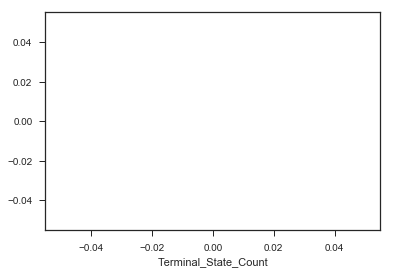

In [19]:
H3_a50 = pd.read_excel('files/H3_a50.xlsx')
H3_a50copy = pd.read_excel('files/grande_bellezza/H3_a50.xlsx')

H3_b = pd.read_excel('files/grande_bellezza/H3_b.xlsx')

H3_c100 = pd.read_excel('files/grande_bellezza/H3_c100.xlsx')
H3_d100 = pd.read_excel('files/grande_bellezza/H3_d100.xlsx')

H3_e100 = pd.read_excel('files/grande_bellezza/H3_e100.xlsx')
H3_e100r2 = pd.read_excel('files/grande_bellezza/H3_e100r2.xlsx')
H3_e100r3 = pd.read_excel('files/grande_bellezza/H3_e100r3.xlsx')



H3_f = pd.read_excel('files/grande_bellezza/H3_f100.xlsx')


H3_ao1 = von_Neumann(H3_a50, '1D')
H3_ao2 = von_Neumann(H3_a50copy, '1D')
H3_bo = von_Neumann(H3_b,'3D')
H3_co = von_Neumann(H3_c100,'6D')
H3_do = von_Neumann(H3_d100,'2D')
H3_eo = von_Neumann(H3_e100,'4D')
H3_eor2 = von_Neumann(H3_e100r2,'4D')
H3_eor3 = von_Neumann(H3_e100r3,'4D')
H3_fo = von_Neumann(H3_f,'5D')

frames = [H3_ao1, H3_ao2, H3_bo, H3_fo, H3_co, H3_do, H3_eo, H3_eor2, H3_eor3]
result = pd.concat(frames)

groupby_confi = result.groupby('Configuration')

sns.distplot((result.loc[result.Configuration=='H3_b']).Terminal_State_Count)

In [18]:
result[result.Configuration == 'H3_e'].describe()

,Nodes_Visited,Terminal_State_Count,Avg_Terminal_Depth,Terminal_Likelihood,Cyclic_Likelihood
count,300.000000,300.000000,284.000000,300.000000,300.000000
mean,11268.763333,1.143333,4.793134,0.003298,0.396706
std,24559.394222,0.526351,1.024040,0.012432,0.356642
min,8.000000,0.000000,2.000000,0.000000,-0.000009
25%,120.000000,1.000000,4.000000,0.000005,0.000000
50%,537.500000,1.000000,5.000000,0.000075,0.327746
75%,7230.500000,1.000000,5.500000,0.000730,0.720308
max,111493.000000,4.000000,7.500000,0.166667,1.000000


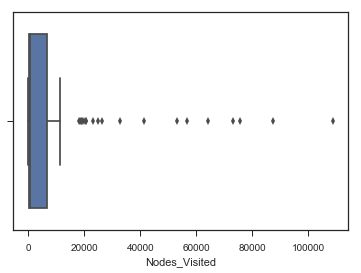

In [37]:
sns.boxplot(H3_do.Nodes_Visited)

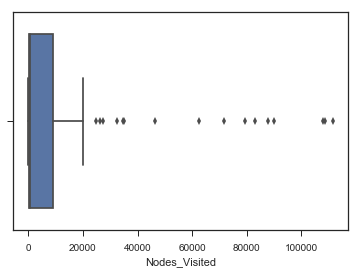

In [33]:
sns.boxplot(H3_eo.Nodes_Visited)

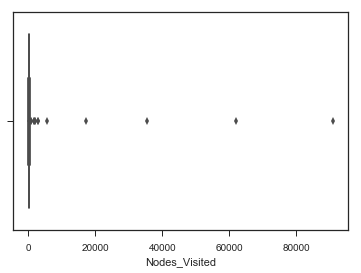

In [36]:
sns.boxplot(H3_bo.Nodes_Visited)

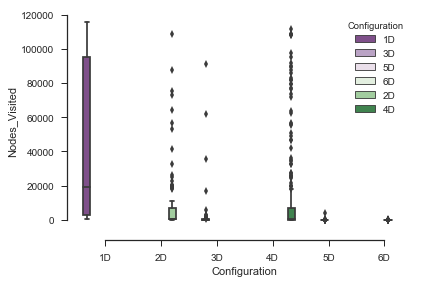

In [29]:
sns.set(style="ticks")


cols = ['1D','2D','3D','4D','5D','6D']

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x = 'Configuration', y="Nodes_Visited", hue="Configuration", data=result, palette="PRGn",order = cols)
sns.despine(offset=10, trim=True)

<H2> H5 Work

In [10]:
def value_correct(df,column_name):

    line_name = column_name
    cl_list = df[column_name]

    updated_line = map(lambda x:x if x>0 else 0, cl_list)

    df[column_name] = pd.Series(updated_line)

    return df

In [11]:
H5_a = pd.read_excel('files/H5_a.xlsx')
H5_b = pd.read_excel('files/H5_b.xlsx')
H5_c = baseline
H5_d50S = pd.read_excel('files/H5_d50S.xlsx')

H5_ao = value_correct(von_Neumann(H5_a,'H5_a'), 'Cyclic_Likelihood')
H5_bo = value_correct(von_Neumann(H5_b,'H5_b'), 'Cyclic_Likelihood')
H5_co = value_correct(von_Neumann(H5_c,'H5_c'), 'Cyclic_Likelihood')
H5_do = value_correct(von_Neumann(H5_d50S,'H5_d'), 'Cyclic_Likelihood')

frames = [H5_ao, H5_bo, H5_co, H5_do]
result = pd.concat(frames)


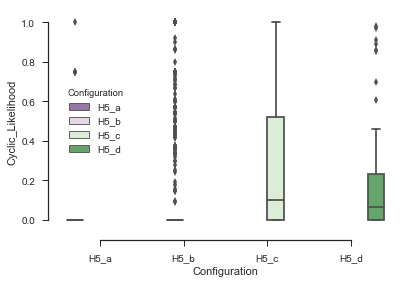

In [12]:
sns.set(style="ticks")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x = 'Configuration', y="Cyclic_Likelihood", hue="Configuration", data=result, palette="PRGn")
sns.despine(offset=10, trim=True)

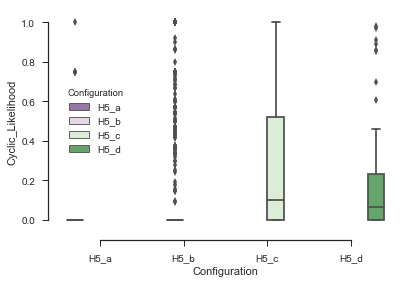

In [13]:
sns.set(style="ticks")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x = 'Configuration', y="Cyclic_Likelihood", hue="Configuration", data=result, palette="PRGn")
sns.despine(offset=10, trim=True)

<H3> H9 WORK

In [14]:
H9_a = pd.read_excel('files/grande_bellezza/H3_b.xlsx')

H9_b50 = pd.read_excel('files/H9_b50.xlsx')
H9_b50copy = pd.read_excel('files/grande_bellezza/H9_b50.xlsx')

H9_ao = value_correct(von_Neumann(H9_a,'H9_a'), 'Cyclic_Likelihood')
H9_bo1 = value_correct(von_Neumann(H9_b50,'H9_b'), 'Cyclic_Likelihood')
H9_bo2 = value_correct(von_Neumann(H9_b50copy,'H9_b'), 'Cyclic_Likelihood')
frames = [H9_bo1, H9_bo2]
H9_bo = pd.concat(frames)

frames = [H9_ao, H9_bo1, H9_bo2]
result = pd.concat(frames)

In [15]:
(result.loc[result.Configuration=='H9_b']).describe()
H9_ao.describe()

,Nodes_Visited,Terminal_State_Count,Avg_Terminal_Depth,Terminal_Likelihood,Cyclic_Likelihood
count,100.000000,100.00,93.000000,100.000000,100.000000
mean,2355.300000,1.05,4.126344,0.024321,0.266829
std,11524.407067,0.50,1.031187,0.105588,0.308253
min,2.000000,0.00,1.000000,0.000000,0.000000
25%,31.000000,1.00,4.000000,0.000111,0.000000
50%,92.000000,1.00,4.000000,0.000748,0.150345
75%,262.500000,1.00,5.000000,0.007291,0.499091
max,90876.000000,4.00,6.000000,1.000000,0.989101


In [16]:
import scipy

scipy.stats.ks_2samp(H9_ao.Cyclic_Likelihood, H9_bo.Cyclic_Likelihood)

Ks_2sampResult(statistic=0.37, pvalue=1.3347399942910654e-06)

In [17]:
baseline = pd.read_excel('files/baseline.xlsx')
H1_b = pd.read_excel('files/H1_b.xlsx')

baseline_o = value_correct(von_Neumann(baseline,'baseline'), 'Cyclic_Likelihood')
H1_bo = value_correct(von_Neumann(H1_b,'H1_b'), 'Cyclic_Likelihood')

In [18]:
import scipy

sample_1 = baseline_o.sample(100)
sample_2 = H1_bo.sample(100)

scipy.stats.ks_2samp(sample_1.Terminal_Likelihood, sample_2.Terminal_Likelihood)

Ks_2sampResult(statistic=0.12, pvalue=0.44312540269882572)

<H2> Hypothesis Testing

In [19]:
import scipy
G1, G2 = H2_a_output.Cyclic_Likelihood, H2_b_output.Cyclic_Likelihood
scipy.stats.ttest_ind(G1, G2, equal_var=False)

NameError: name 'H2_a_output' is not defined

In [ ]:
H9_b50

In [ ]:
from scipy.stats import ks_2samp

x = baseline.Visited
y = H1_b.Visited
z = H2_b.Visited

ks_2samp(x, y)

<h2> Regression Analysis

In [ ]:
y = np.log(baseline.Visited)
x = np.log(baseline.Time)

plt.scatter(x, y)
plt.show()

<h4> H4: Variance in Power Distribution and Chaos

In [ ]:
# Variance in Power Distribution

def PV(df):
    PV_list = []
    power_list = ['A Power','B Power','C Power','D Power','E Power','F Power','G Power','H Power','G Power', 'H Power','I Power','J Power']
    #power_list = ['A Power','B Power','C Power']
    
    for i in df.index:
        p_list = []
        
        for power in power_list:
            p_list.append(df[power][i])
        
        normalized_variance = np.var(p_list)/np.square(np.mean(p_list))
        
        PV_list.append(normalized_variance)
    
    PV_series = pd.Series(PV_list)
    return PV_series

def PM(df):
    p_list = []
    power_list = ['A Power','B Power','C Power','D Power','E Power','F Power','G Power','H Power','G Power', 'H Power','I Power','J Power']
    #power_list = ['A Power','B Power','C Power']

    for i in df.index:        
        for power in power_list:
            p_list.append(df[power][i])
        
            
    p_series = pd.Series(p_list)
    return p_series

In [ ]:
# frames = [H1_b, baseline]
# result = pd.concat(frames)


In [ ]:
def Power_von_Neumann(output):
    
    df = pd.DataFrame(columns=['Power_Variance', 'Nodes_Visited','Terminal_State_Count', 'Avg_Terminal_Depth', 
                          'Terminal_Likelihood', 'Cyclic_Likelihood'])

    df['Power_Variance'] = PV(output)
    df['Nodes_Visited'] = NV(output)
    df['Terminal_State_Count'] = TSC(output)
    df['Avg_Terminal_Depth'] = ATD(output)
    df['Terminal_Likelihood'] = TL(output)
    df['Cyclic_Likelihood'] = CL(output)
    
    
    return df

In [ ]:
result1 = Power_von_Neumann(baseline)
result2 = Power_von_Neumann(H1_b)
result3 = Power_von_Neumann(H2_b)

frames = [result1, result2, result3]
result = pd.concat(frames)

In [ ]:
# additional datasets

H4_PF1000 = pd.read_excel('files/grande_bellezza/H4_PF1000.xlsx')

#PF1000 = Power_von_Neumann(H4_PF1000)

In [ ]:
#changes here

x = (result.Power_Variance)
y = (result.Cyclic_Likelihood)

pair_df = pd.DataFrame()
pair_df['Power_Variance'] = x
pair_df['Cyclic_Likelihood'] = y


filtered_pair =pair_df[pair_df.Power_Variance<=0.7]
filtered_pair =filtered_pair[filtered_pair.Cyclic_Likelihood>=0]

In [ ]:
np.sum(result.Power_Variance>0.6)

In [ ]:
pair_df = filtered_pair

x = filtered_pair.Power_Variance
#changes here
y = filtered_pair.Cyclic_Likelihood

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)

plt.figure(num=None, figsize=(12, 8), dpi=111, facecolor='w', edgecolor='k')

plt.plot(x,y, 'o', label='Original Data')
plt.plot(x, intercept + slope*x, 'r', label='Fitted Line')
plt.xlabel('Power_Variance')
plt.ylabel('Cyclic_Likelihood')
plt.legend()
plt.show()

#sns.regplot(x="Normalized Power Variance", y="Cyclic Likelihood", data=pair_df);


In [ ]:

sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
g = (sns.jointplot(x,y, data=pair_df, kind="kde",size=10))

#g = sns.jointplot(x="Normalized Power Variance", y="Cyclic Likelihood", data=pair_df, kind="kde", color="m")
#g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
#g.ax_joint.collections[0].set_alpha(0)
#g.set_axis_labels("$X$", "$Y$");

In [ ]:
slope, intercept, r_value, p_value, std_err

In [ ]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns.residplot(x,y)


In [ ]:
sns.distplot(result.Power_Variance)

<h3> PCMA METHOD

In [ ]:
def pseudo_sampling(df, outcome_name = 'Cyclic_Likelihod', n = 100):
    max_input_value = np.max(df.Power_Variance)
    min_input_value = np.min(df.Power_Variance)
    increment = (max_input_value-min_input_value)/n
    
    #print max_input_value, min_input_value,increment
    
    sample_mean_list = []
    
    for i in range(1,n+1):
        lower_bound = min_input_value + increment*(i-1)
        upper_bound = min_input_value + increment*i
        #print lower_bound, upper_bound
        
        r1 = df[df.Power_Variance<=upper_bound]
        r2 = r1[r1.Power_Variance>=lower_bound]
        
        #print(len(r1))
        #print(len(r2))
        
        sample_mean = np.mean(r2[outcome_name])
        sample_mean_list.append(sample_mean)
    
    x = range(1,n+1)
    
    result = pd.DataFrame()
    result['input_interval'] = pd.Series(x)
    result['outcome_mean'] = pd.Series(sample_mean_list)
    
    return result
        
        

In [ ]:
sample_mean_df = pseudo_sampling(result, outcome_name='Terminal_Likelihood', n =50)

filter_sm_df = sample_mean_df.dropna()[:30]

In [ ]:
x = filter_sm_df.input_interval
#changes here
y = filter_sm_df.outcome_mean

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)

plt.figure(num=None, figsize=(12, 8), dpi=111, facecolor='w', edgecolor='k')

plt.plot(x,y, 'o', label='Original Data')
plt.plot(x, intercept + slope*x, 'r', label='Fitted Line')
plt.xlabel('Input_Interval')
plt.ylabel('Outcome_Mean')
plt.legend()
plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err

In [ ]:
slope*50

<H3> Verification and Validation

In [ ]:
sns.distplot(baseline['D Power'])

In [ ]:
range(0,3)

In [ ]:
baseline_o



ks_statistic, p_value = scipy.stats.ks_2samp(baseline_o.sample(100).Cyclic_Likelihood, baseline_o.sample(100).Cyclic_Likelihood)

In [ ]:
import scipy

def ks_test_table(df, variable_name):
    
    result_df = pd.DataFrame()
    ks_list = []
    pv_list = []
    
    for i in range(0,100):
            ks_statistic, p_value = scipy.stats.ks_2samp(df.sample(100)[variable_name], 
                                                         df.sample(100)[variable_name])
            ks_list.append(ks_statistic)
            pv_list.append(p_value)
    
    result_df['ks-statistic'] = pd.Series(ks_list)
    result_df['p-value'] = pd.Series(pv_list)
    
    return result_df

In [ ]:
sns.distplot(ks_test_table(H9_ao, 'Cyclic_Likelihood')['p-value'],bins=20, kde=False, rug=False)

In [ ]:
sns.boxplot(ks_test_table(H9_ao, 'Cyclic_Likelihood')['p-value'])

In [ ]:
np.sum(ks_test_table(H9_ao, 'Cyclic_Likelihood')['p-value']<0.01)